# Task- Iris Flower Classification

In [58]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing as sp
from sklearn.metrics import accuracy_score

In [59]:
data=pd.read_csv('IRIS (1).csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
data.shape

(150, 5)

In [63]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [64]:
corr=data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

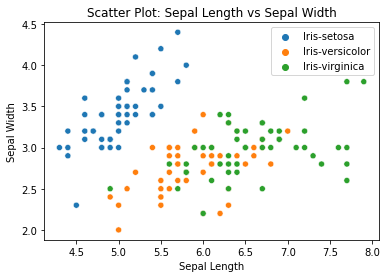

In [65]:
# Scatter plot between sepal length and sepal width with different colors for different species
plt.figure()
sns.scatterplot(x='sepal_length', y='sepal_width', data=data ,hue='species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.legend()
plt.show()

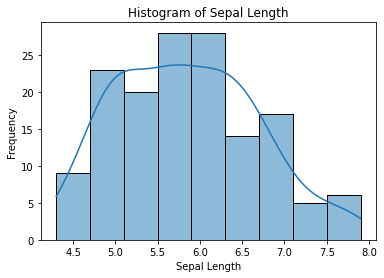

In [23]:
#  histogram for 'sepal_length'
plt.figure()
sns.histplot(data['sepal_length'], kde=True)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

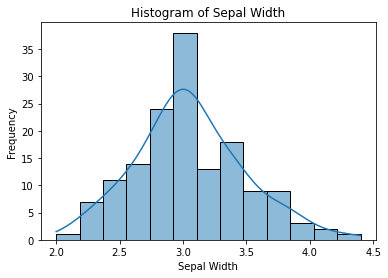

In [25]:
# histogram for 'sepal_length'
plt.figure()
sns.histplot(data['sepal_width'], kde=True)
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.show()

In [66]:
# Feature Scaling
X=np.c_[data.iloc[:,0:4]]
Y=data.iloc[:,4]
encoder=sp.LabelEncoder()
Y_1=encoder.fit_transform(Y).reshape(-1,1)
Y_1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [67]:
# split dataset into train,test
train_x,test_x,train_y,test_y=train_test_split(X,Y_1)

In [68]:
model=lm.LogisticRegression()

# train the model
model.fit(train_x,train_y)

# make predictions on test dataset
pred_y=model.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
# make predictions on test dataset
pred_y=model.predict(test_x)
pred_y

array([0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0])

In [71]:
# from sklearn.model_selection import cross_val_predict
import sklearn.model_selection as ms
y_train_pred = ms.cross_val_predict(model, train_x, train_y)
pred_y=model.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [72]:
conf_mx = confusion_matrix(test_y, pred_y)
conf_mx = confusion_matrix(train_y, y_train_pred)
conf_mx

array([[34,  0,  0],
       [ 0, 38,  2],
       [ 0,  2, 36]], dtype=int64)

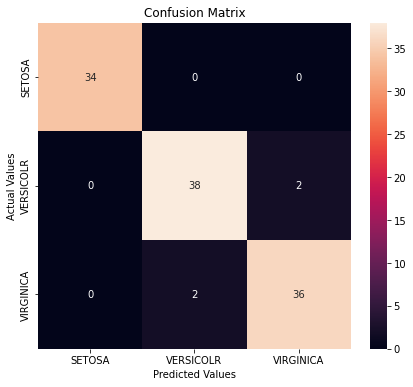

In [73]:
import seaborn as sns
conf_mx=pd.DataFrame(conf_mx,index=['SETOSA','VERSICOLR','VIRGINICA'],columns=['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,6))
sns.heatmap(conf_mx,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [74]:
report=classification_report(test_y,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [75]:
print("accuracy is",accuracy_score(test_y,pred_y)*100)

accuracy is 97.36842105263158
